# Citibike stations fluid rates
Group Members:
Cindy Y. Liu, Yuxiang Zhang

In [1]:
#Load Default settings
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline
import os
import json
s = json.load( open(os.getenv ('PUI2015')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load Citibike data
df=pd.read_csv(os.getenv ('PUI2015')+'/data/201508-citibike-tripdata.csv')
df['date'] = pd.to_datetime(df['starttime'])

In [3]:
# Drop unnecessary features
df.drop('tripduration',1)
df.drop('starttime',1)
df.drop('stoptime',1)

tripduration           starttime  start station id  \
0                1202   8/1/2015 00:00:04               168   
1                 301   8/1/2015 00:00:05               450   
2                 431   8/1/2015 00:00:06               312   
3                 273   8/1/2015 00:00:09               382   
4                1256   8/1/2015 00:00:17               352   
5                 739   8/1/2015 00:00:24               212   
6                 433   8/1/2015 00:00:30               388   
7                1575   8/1/2015 00:00:33               492   
8                 843   8/1/2015 00:00:39               387   
9                 467   8/1/2015 00:00:49               285   
10               1540   8/1/2015 00:00:48               492   
11               1593   8/1/2015 00:00:56               492   
12               1459   8/1/2015 00:00:58               476   
13                644   8/1/2015 00:01:08               263   
14                192   8/1/2015 00:01:10                79   
15                618   8/1/2015 00:01:13               379   
16                703   8/1/2015 00:01:33               368   
17                254   8/1/2015 00:01:36               336   
18               1443   8/1/2015 00:01:47               426   
19                239   8/1/2015 00:01:59               281   
20                476   8/1/2015 00:01:59               229   
21                723   8/1/2015 00:02:00               439   
22                771   8/1/2015 00:02:04               347   
23                524   8/1/2015 00:02:10               293   
24                551   8/1/2015 00:02:09               329   
25               2183   8/1/2015 00:02:10              3002   
26               2150   8/1/2015 00:02:19              3002   
27                542   8/1/2015 00:02:36               335   
28                948   8/1/2015 00:02:41               502   
29               1287   8/1/2015 00:03:05               261   
...               ...                 ...               ...   
1179014           753  8/31/2015 23:54:00               423   
1179015           689  8/31/2015 23:54:18               448   
1179016           550  8/31/2015 23:54:34               318   
1179017           440  8/31/2015 23:54:39               403   
1179018           537  8/31/2015 23:55:01               353   
1179019           578  8/31/2015 23:55:14               116   
1179020          1419  8/31/2015 23:55:15              3002   
1179021          1394  8/31/2015 23:55:27               326   
1179022          1134  8/31/2015 23:55:31              2002   
1179023          1083  8/31/2015 23:55:49               459   
1179024           455  8/31/2015 23:55:51               536   
1179025           846  8/31/2015 23:56:03               293   
1179026           206  8/31/2015 23:56:21               428   
1179027          1560  8/31/2015 23:56:32               469   
1179028           936  8/31/2015 23:56:51               518   
1179029           227  8/31/2015 23:56:55              3002   
1179030           296  8/31/2015 23:57:20               489   
1179031           526  8/31/2015 23:57:36               519   
1179032           874  8/31/2015 23:57:39               490   
1179033          1444  8/31/2015 23:58:03               152   
1179034           254  8/31/2015 23:58:14               336   
1179035           413  8/31/2015 23:58:15               358   
1179036          1386  8/31/2015 23:58:20               238   
1179037           289  8/31/2015 23:58:42               490   
1179038           440  8/31/2015 23:58:42               439   
1179039           423  8/31/2015 23:58:43              3119   
1179040          1021  8/31/2015 23:58:54               518   
1179041          1896  8/31/2015 23:59:11               336   
1179042           826  8/31/2015 23:59:16              3075   
1179043           105  8/31/2015 23:59:41               476   

                        start station name  start station latitude  \
0                          W 18 

In [4]:
## Store the information of stations into a csv file. including longitude latitude, and id
start=pd.DataFrame({'id': df['start station id'], \
                    'lat': df['start station latitude'],\
                    'lon':df['start station longitude']})
end=pd.DataFrame({'id': df['end station id'], \
                    'lat': df['end station latitude'],\
                    'lon':df['end station longitude']})
merged=pd.concat([start,end],axis=0)
merged=merged.drop_duplicates('id')
merged.to_csv('station.csv')   

We use ArcGis to reverse Geocoding the latitude and longitude information into a real street information. We get the borough information for each Citibike station and store the information into the stationbyborough.csv

In [5]:
import pandas as pd
stations_by_borough=pd.read_csv('data/stationbyborough.csv')
in_jour=np.zeros(len(stations_by_borough))
out_jour=np.zeros(len(stations_by_borough))
fluid_ratio=np.zeros(len(stations_by_borough))
for index,station in stations_by_borough.iterrows():
    s=sum(df['start station id']==station['id'])
    e=sum(df['end station id']==station['id'])
    in_jour[index]=s
    out_jour[index]=e
    fluid_ratio[index]=s/float(e)

In [6]:
results=pd.DataFrame({'sid':stations_by_borough['id'],\
                      'income':in_jour,\
                      'outcome':out_jour,\
                      'ratio':fluid_ratio,\
                      'borough':stations_by_borough['BoroName']})
cols = ['sid','income','outcome','ratio','borough']
results=results[cols]
results.to_csv('result.csv')

## Statistic Analysis

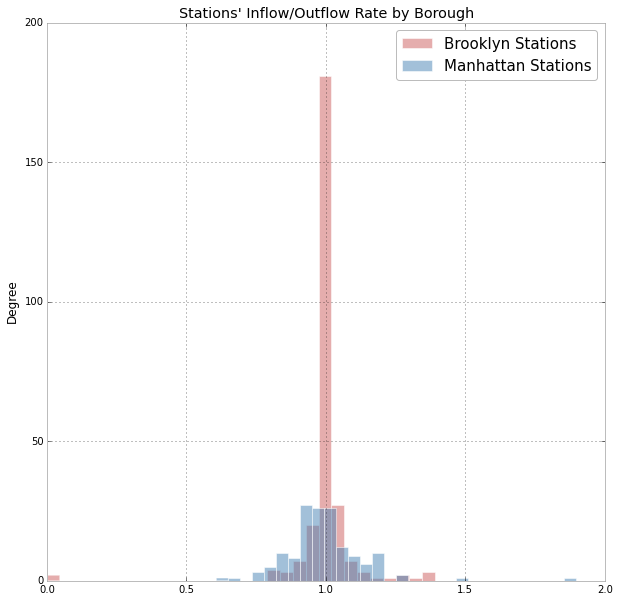

In [38]:
manhattan=results[results['borough']=='Manhattan']
brooklyn=results[results['borough']=='Brooklyn']
queens=results[results['borough']=='Queens']

norm_m=1
norm_b=1

error_m=np.sqrt(manhattan['ratio'].count())
error_b=np.sqrt(brooklyn['ratio'].count())
fig=pl.figure(figsize(10,10))
manhattan['ratio'].plot(kind="hist",yerr=[((error_m)/norm_m,(error_m)/norm_m)],\
                        bins=30,color='IndianRed', alpha=0.5,label='Manhattan Stations')
brooklyn['ratio'].plot(kind="hist",yerr=[((error_b)/norm_b,(error_b)/norm_b)],\
                       bins=30, alpha=0.5,label='Brooklyn Stations')
pl.legend(['Brooklyn Stations','Manhattan Stations'],fontsize=15)
pl.title('Stations\' Inflow/Outflow Rate by Borough' )

# t test for mean ratio of two samples.

$H_{0} : mean_m-mean_b>0$

$H_{\alpha}: mean_m-mean_b<=0$

In [72]:
import scipy.stats as ss
mean_m=np.mean(manhattan['ratio'])
mean_b=np.mean(brooklyn['ratio'])
std_m=np.std(manhattan['ratio'])
std_b=np.std(brooklyn['ratio'])
n_m=len(manhattan)
n_b=len(brooklyn)

t, p=ss.ttest_ind(manhattan['ratio'],brooklyn['ratio'],equal_var = False)
print "ttest_ind: t = %g  p = %g" % (t, p)

ttest_ind: t = 0.150304  p = 0.880645


In [73]:
alpha =0.05
def report_result(p,a):
    print 'Is the p value {0:.2f} smaller than the critical value {1:.2f}? '.format(p,a)
   
    print '{0}, the Null hypothesis is {1}'.format( 'Yes' if p<a  else 'No','rejected'if p<a else'not rejected')

    
report_result(p,alpha)

Is the p value 0.88 smaller than the critical value 0.05? 
No, the Null hypothesis is not rejected


# Z test for the proportion of ration>1/ration_all in two samples.

$H_{0} : p_m-p_b>0$

$H_{\alpha}: p_m-p_b<=0$

In [68]:
P_0=sum(manhattan['ratio']>=1)/float(len(manhattan))
P_1=sum(brooklyn['ratio']>=1)/float(len(brooklyn))

n_0=len(manhattan)
n_1=len(brooklyn)

Nt_0=P_0*n_0
Nt_1=P_1*n_1
print P_0
print P_1
print n_0
print n_1
# Pooled Sample Proportion
psp=(P_0*n_0+P_1*n_1)/(n_1+n_0)

SE= lambda p, n1, n2: np.sqrt(psp*(1-psp)*(1/float(n1)+1/float(n2)))

se=SE(P_0,n_0,n_1)

# z score
zscore = lambda p0, p1, s : (p0-p1)/s
z = zscore(P_1, P_0, se)
print(z)

0.423664122137
0.439189189189
262
148
0.305030069472


In [70]:
p=1-0.6179
alpha =0.05
def report_result(p,a):
    print 'Is the p value {0:.2f} smaller than the critical value {1:.2f}? '.format(p,a)
   
    print '{0}, the Null hypothesis is {1}'.format( 'Yes' if p<a  else 'No','rejected'if p<a else'not rejected')

    
report_result(p,alpha)

Is the p value 0.38 smaller than the critical value 0.05? 
No, the Null hypothesis is not rejected
